Import numpy, pandas, and matplotlib

In [10]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy import stats

Use numpy to load the data file, then store the data in a variable

In [3]:
data = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", skiprows = 2, delimiter = ",")

Store names of colums in list names

In [4]:
names = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", dtype=str, skiprows = 1, delimiter = ",")[0]

Create a dataframe from the csv file.

In [5]:
df = pd.read_csv("/Users/marin/machine/redshift_data_project/Skyserver_Spectro2_13_2018 10_41_13 PM.csv", \
                 delimiter = ",", skiprows=1)
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Plots a histogram for every value in each column

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


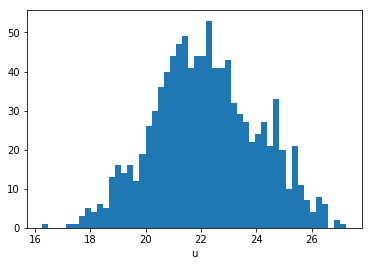

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


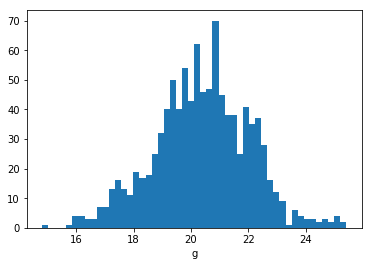

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


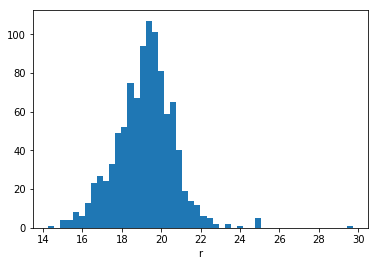

Series([], Name: objid, dtype: int64)
607    1237646379377885363
Name: objid, dtype: int64


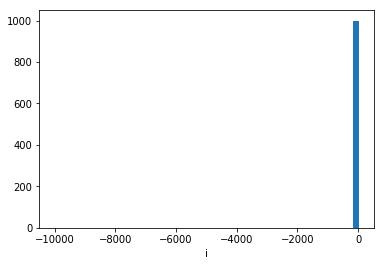

Series([], Name: objid, dtype: int64)
607    1237646379377885363
Name: objid, dtype: int64


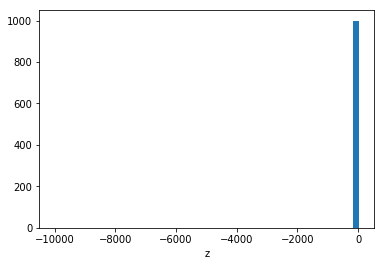

660    1237646586638697424
Name: objid, dtype: int64
Series([], Name: objid, dtype: int64)


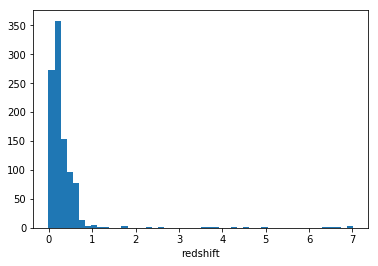

In [6]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
for name in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    print(df['objid'][df[name] == 0.])
    print(df['objid'][df[name] == -9999])
    plt.hist(df[name], bins=50)
    plt.xlabel(name)
    plt.show()

Filters out values of -9999 and 0 from columns, leaving only actual data

In [7]:
df_filtered = df[(df['i'] != -9999.0) & (df['z'] != -9999.0) & (df['redshift'] != 0.00)]
df_filtered.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


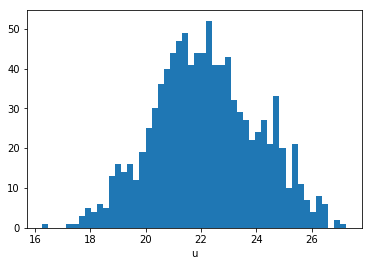

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


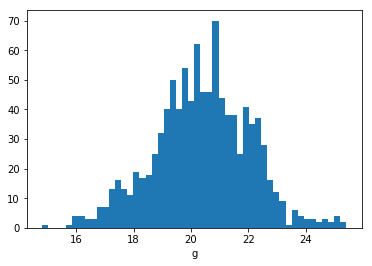

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


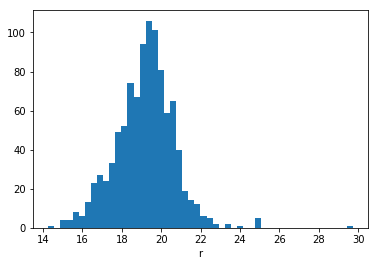

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


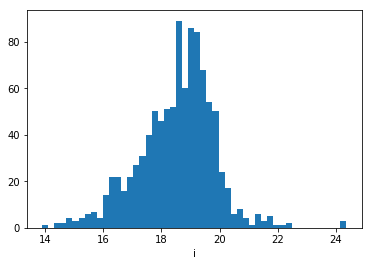

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


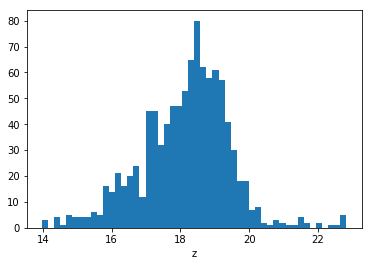

Series([], Name: objid, dtype: int64)
Series([], Name: objid, dtype: int64)


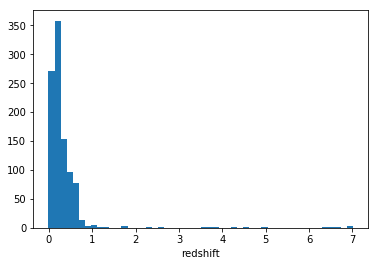

In [9]:
for name in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    print(df_filtered['objid'][df_filtered[name] == 0.])
    print(df_filtered['objid'][df_filtered[name] == -9999])
    plt.hist(df_filtered[name], bins=50)
    plt.xlabel(name)
    plt.show()

In [7]:
print(names)

['objid' 'ra' 'dec' 'u' 'g' 'r' 'i' 'z' 'redshift' 'specobjid' 'plate'
 'mjd' 'fiberid']


Create a variable y, where y is the redshift. y is a vector.

In [8]:
y = data.T[8]

Create a variable x, where x is the values that are obtained when astrophysicists try to determine the redshift with the "colored glasses". x is a 4 by 1000 matrix.

In [9]:
x = data.T[3:8]

Create a variable, x_rot, which is x transposed. A transposed matrix is one where the first row becomes the first column, second row becomes the second column, etc.

In [10]:
x_rot = x.T

Creates equivalents to y and x_rot using the filtered dataframe instead.

In [11]:
filtered_y = df_filtered['redshift']
filtered_x = df_filtered.iloc[:,3:8]
filtered_x.head()

,u,g,r,i,z
0,25.92735,20.99570,19.24612,18.56461,18.43049
1,19.38905,18.24496,17.58728,17.20807,16.90905
2,21.50923,19.69340,18.47973,17.91998,17.55132
3,20.96947,20.29136,19.36779,18.86387,18.45551
4,25.27165,22.32081,21.33033,19.94852,19.47201


Calls reg.fit on filtered_x and filtered_y, then uses reg.predict on filtered_x.

reg.fit takes two parameters: x_rot and y. x_rot is the array of training data and y is the array of target values. reg.fit creates an equation that fits most of the data points. It does this by finding b, m in

$y_{obs, i} = m \cdot a_{i} + b + \sigma_{i} = y_{pred, i} + \sigma_{i}$
by minimizing $\chi^{2}$ when using all $i=1, ...,N$ for N galaxies

reg.fit specifically passes in y for $y_{obs, i}$ and x_rot for $a_{i}$, which leaves only m and b (plus the error value). m is a vector and b and $\sigma_{i}$ are scalars (because $y_{obs,i}$ is a scalar)

$y_{obs, i} = m \cdot a_{i} + b + \sigma_{i}$

It leaves the job of actually plugging in values for $a_{i}$ and solving for $y_{pred, i}$ to reg.predict. 

filtered_y_for_graph is taking the dot product of m and the array of x values. This will create an array of y values that have the slope of the best fit line.

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (filtered_x,filtered_y)
filtered_y_for_graph = reg.predict(filtered_x)

Coefficients is a vector with 5 elements because $a_{i}$ has five dimensions, and reg.fit calculates m for all five. This also works out so that $y_{obs,i}$ is a scalar. reg.intercept represents b in the equation, and there is only one value because b is a scalar.

In [13]:
coefficients = (reg.coef_)
print(coefficients)
print(reg.intercept_)

[-0.01998865  0.12297988 -0.00624468  0.00656873  0.00455183]
-1.8144529721670781


Create a list, filtered_x_list, with the minimum and maximum values for each value (u, g, r, i, z) out of the 1000 given. This is to create a range of x values for plotting the best fit line (since filtered_y_for_graph is only y values, it needs corresponding x values).

In [14]:
filtered_x_list = []
for column in filtered_x:
    filtered_x_list.append(min(filtered_x[column]))
    filtered_x_list.append(max(filtered_x[column]))
print(filtered_x_list)

[16.25679, 27.24833, 14.80274, 25.424970000000002, 14.26476, 29.72628, 13.898439999999999, 24.36224, 13.9735, 22.827070000000003]


one_filtered_x_for_plotting is an array consisting of 4 evenly spaced numbers from the minimum value in filtered_x_list to the maximum value in filtered_x_list. This is to create a range of x values to go with the y values so that a line can be made.
filtered_x_for_plotting is a 2d array with five 4-element arrays inside, one for each "filter" (u,g,r,i,z). Theoretically this should be done using the actual values. This will be fixed!
filtered_y_for_grid uses reg.predict. reg.predict takes the trasnposed matrix of x_for_plotting, and for each one out of five, takes the dot product of m and the array of x values in that particular filter. It returns five arrays of y values, so there are five graphs.

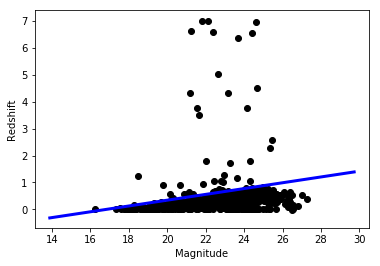

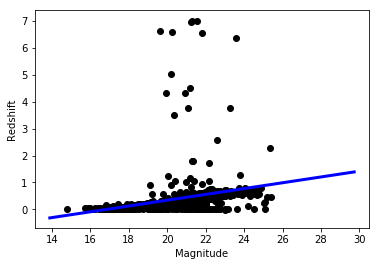

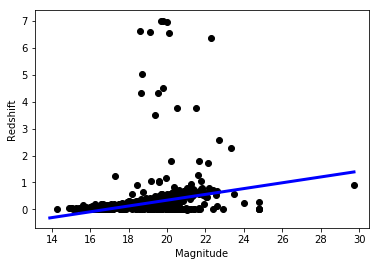

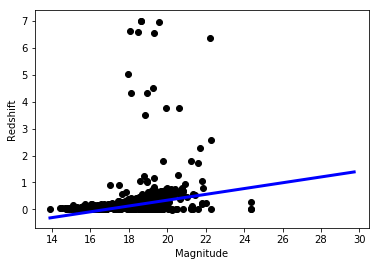

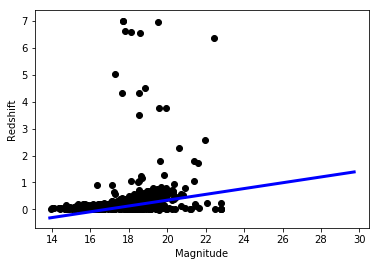

In [15]:
one_filtered_x_for_plotting = numpy.linspace(min(filtered_x_list), max(filtered_x_list), 5)
filtered_x_for_plotting = numpy.asarray([one_filtered_x_for_plotting, one_filtered_x_for_plotting, \
                                         one_filtered_x_for_plotting, one_filtered_x_for_plotting, \
                                         one_filtered_x_for_plotting])

filtered_y_for_grid = reg.predict(filtered_x_for_plotting.T)

for i in range(5):
    plt.scatter(filtered_x.iloc[:,i], filtered_y, color='black')
    plt.plot(filtered_x_for_plotting[i], filtered_y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()

The function chi_square_error calculates the goodness of fit using the chi-squared test, which is the sum of all of the predicted values minus the observed values squared, then divided by the predicted values.

In [16]:
def chi_square_error(observed_y, predicted_y):
    error = 0
    observed_y_list = observed_y.tolist()
    predicted_y_list = predicted_y.tolist()
    for i in predicted_y_list:
        error += ((observed_y_list[predicted_y_list.index(i)] - i)**2)/numpy.var(predicted_y)**2
    print(error)

chi_square_error(filtered_y, filtered_y_for_grid)

11.767931753891357


A plot of the error value versus the numer of y values with the error value. This plot shows that there are a lot of points with very little error value while there are a few points with a large error value.

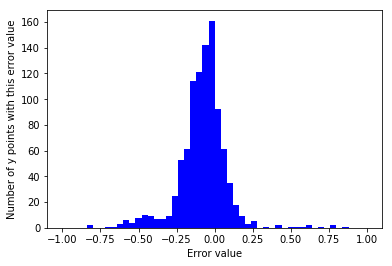

In [17]:
error = numpy.subtract(filtered_y, filtered_y_for_graph)
plt.hist(error, range = [-1, 1], bins=50, color='blue')
plt.xlabel('Error value')
plt.ylabel('Number of y points with this error value')
plt.show()

A plot of magnitude versus error value. This plot looks similar to the actual plot of magnitude versus redshift, which is a property of error graphs. 

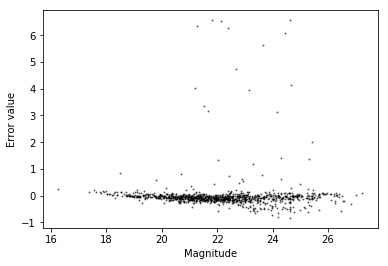

In [18]:
plt.scatter(filtered_x.iloc[:,0], error, color='black', s=1, alpha=0.5)
plt.xlabel('Magnitude')
plt.ylabel('Error value')
plt.show()

A plot of redshift versus error value. There are many redshift values at 0.0 or very close, because of the placeholder values. 

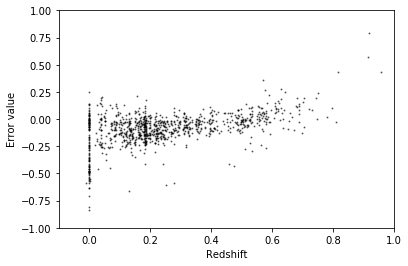

In [19]:
plt.scatter(filtered_y, error, color='black', s=1, alpha=0.5)
plt.xlim(-0.1, 1)
plt.ylim(-1,1)
plt.xlabel('Redshift')
plt.ylabel('Error value')
plt.show()

# Questions
Why don't we use the equation we got from reg.fit in the plot (versus reg.predict)?
What's the point of making x_for_plotting be 2 dimensional if we're only taking the first value in the plot? Ans: we can't plot stuff in 5 dimensions
Why do we need to transpose x_for_plotting when we predict values? Ans: Some methods are inconsistent and require transposing x
Why do we create x_list with the minimum and maximum values for each variable? Ans: to create the x values for x_for_plotting. Since some x values are -9999 because they are placeholders, we can't have that be the minimum range for the graph so we use 15.
Why do we only take the first element in x when making the scatterplot? Isn't that equivalent to only using the variable u to plot the points? How can we use all 4 variables (wasn't that the point in the first place)? Ans: We can't plot stuff in 5 dimensions. We are only using u (the magnitude) as the x value.